<a href="https://colab.research.google.com/github/AdrianP03/ST1Capstone/blob/main/ST1Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST1/ST1G Assignment 9 (Capstone Programming Project)**


In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
%cd /content/drive/MyDrive/ST1Capstone/

/content/drive/MyDrive/ST1Capstone


In [51]:
!ls

CellphoneData.csv


### This capstone project is based on the Mobile Price Prediction. The data is available from the Kaggle repository: (https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction).



*   It contains the details of cellphone prices and specifications.
*   My project task is to create a machine learning model which can predict cellphone prices based on their characteristics.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.


### Step 1: Reading the data with python

In [52]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Reading the dataset
import pandas as pd
import numpy as np
CellphoneData = pd.read_csv('/content/drive/MyDrive/ST1Capstone/CellphoneData.csv', encoding='latin')
print('Shape before deleting duplicate values:', CellphoneData.shape)

# Removing duplicate rows if any
CellphoneData=CellphoneData.drop_duplicates()
print('Shape After deleting duplicate values:', CellphoneData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CellphoneData.head(10)


Shape before deleting duplicate values: (161, 14)
Shape After deleting duplicate values: (161, 14)


,Product ID,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


## Key observations from Step 1 about the Data Description


*   This file contains 161 different cellphones.
*   There are 14 attributes and they are outlined below.



*   **Product ID** - Product ID of the cellphone
*   **Price** - Price of the cellphone
*   **Sale** - Number of sales
*   **Weight** - Weight of the cellphone
*   **Resolution** - Resolution of the cellphone
*   **PPI** - Phone pixel density (pixels per inch)
*   **CPU Core** - Number of CPU cores of the cellphone
*   **CPU Freq** - CPU frequency of the cellphone
*   **Internal Mem** - Internal memory of the cellphone
*   **RAM** - RAM of the cellphone
*   **Rear Cam** - Megapixels of cellphone rear camera
*   **Front Cam** - Megapixels of cellphone front camera
*   **Battery** - Milliampere hours of the cellphone
*   **Thickness** - Thickness of the cellphone

# Step 2 : Problem Statement Definition
* Developing a predictive model to estimate the price of a cellphone based on its specifications.

## Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.
* **Target Variable:** Price
* **Predictors/Features:** Price, Sale, Weight, Resolution, PPI, etc.

* Based on the problem statement we need to create a supervised machine learning regression model, as the target variable (Price) is **Continuous**.

* This will enable me to predict the price of a cellphone using its specifications.


# Step 4: Looking at the class distribution
* We need to ensure that the histogram of the cellphone price displays characteristics of a bell curve or a slight skew to avoid potential biases or issues in the predictive model.

<Axes: >

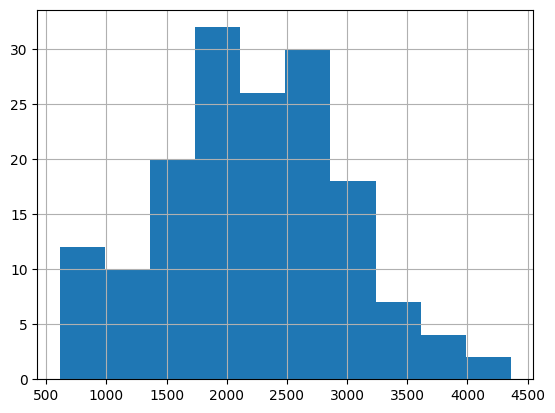

In [54]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the close values
CellphoneData['Price'].hist()

* **Y-axis (Vertical):** Number of phones
* **X-axis (Horizontal):** Cellphone price

## Observations from Step 4
* The histogram represents a mostly balanced bell curve.
* The data distribution of the target variable is satisfactory to proceed further.
* There are sufficient number of rows for each type of values to learn from.

## Step 5: Basic Exploratory Data Analysis

In [55]:
# Looking at sample rows in the data
CellphoneData.head()

,Product ID,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [56]:
# Looking at sample rows in the data
CellphoneData.tail()

,Product ID,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [57]:
# Observing the summarised information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
CellphoneData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product ID    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   Weight        161 non-null    float64
 4   Resolution    161 non-null    float64
 5   PPI           161 non-null    int64  
 6   CPU Core      161 non-null    int64  
 7   CPU Freq      161 non-null    float64
 8   Internal Mem  161 non-null    float64
 9   RAM           161 non-null    float64
 10  Rear Cam      161 non-null    float64
 11  Front Cam     161 non-null    float64
 12  Battery       161 non-null    int64  
 13  Thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [58]:
# Looking at the descriptive statistics of the data
CellphoneData.describe(include='all')

,Product ID,Price,Sale,Weight,Resolution,PPI,CPU Core,CPU Freq,Internal Mem,RAM,Rear Cam,Front Cam,Battery,Thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [59]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
CellphoneData.nunique()

Product ID       83
Price            81
Sale            125
Weight           62
Resolution       24
PPI              45
CPU Core          6
CPU Freq         28
Internal Mem     10
RAM              12
Rear Cam         18
Front Cam        15
Battery          55
Thickness        49
dtype: int64

## Observations from Step 5 - Basic Exploratory Data Analysis

*   **Product ID** - Qualitative. Not selected.
*   **Price** - Continuous. Selected. (Target Variable)
*   **Sale** - Continuous. Selected.
*   **Weight** - Continuous. Selected.
*   **Resolution** - Continuous. Selected.
*   **PPI** - Continuous. Selected.
*   **CPU Core** - Categorical. Selected.
*   **CPU Freq** - Continuous. Selected.
*   **Internal Mem** - Categorical. Selected.
*   **RAM** - Categorical. Selected.
*   **Rear Cam** - Continuous. Selected.
*   **Front Cam** - Continuous. Selected.
*   **Battery** - Continuous. Selected.
*   **Thickness** - Continuous. Selected.

## Step 6: Removing unwanted columns
* Product ID is qualitative data and do not affect cellphone sales in any way. This column is irrelevant to my analysis and has not been selected.

## Step 7: Visual Exploratory Data Analysis

* Categorical Predictors:

* 'CPU Cores',
* 'RAM'
* 'Internal Memory'

* We will use bar charts to see how the data is distributed for these categorical columns.


In [60]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

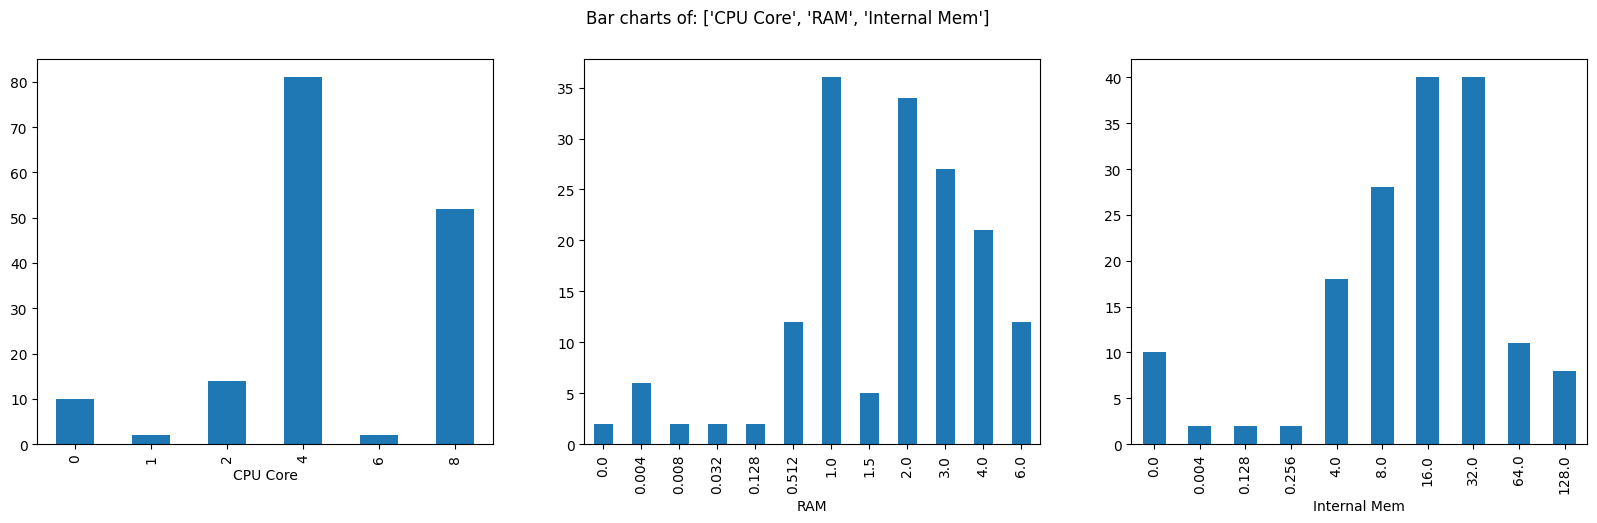

In [61]:
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=CellphoneData, colsToPlot=['CPU Core','RAM','Internal Mem'])

## Observations from Step 7 - Visual Exploratory Data Analysis

* The most logical way to represent the data is via bar charts.
* The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
* **'CPU Core'** - This column has been selected for further analysis as the column has 2 dominant bars (not just one) being 4 cores and 8 cores.
* **'RAM'** and **'Internal Mem'** - These columns have been selected for further analysis as numerous bars in each chart have comparable frequencies.

## Step 8: Visualise distribution of all the Continuous Predictor variables in the data using histograms
* Based on the Basic Exploratory Data Analysis, there are nine continuous predictor variables 'Sale', 'Weight', 'Resolution', 'PPI', 'CPU Freq', 'Rear Cam', 'Front Cam', 'Battery', and 'Thickness'.

array([[<Axes: title={'center': 'Sale'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Resolution'}>],
       [<Axes: title={'center': 'PPI'}>,
        <Axes: title={'center': 'CPU Freq'}>,
        <Axes: title={'center': 'Rear Cam'}>],
       [<Axes: title={'center': 'Front Cam'}>,
        <Axes: title={'center': 'Battery'}>,
        <Axes: title={'center': 'Thickness'}>]], dtype=object)

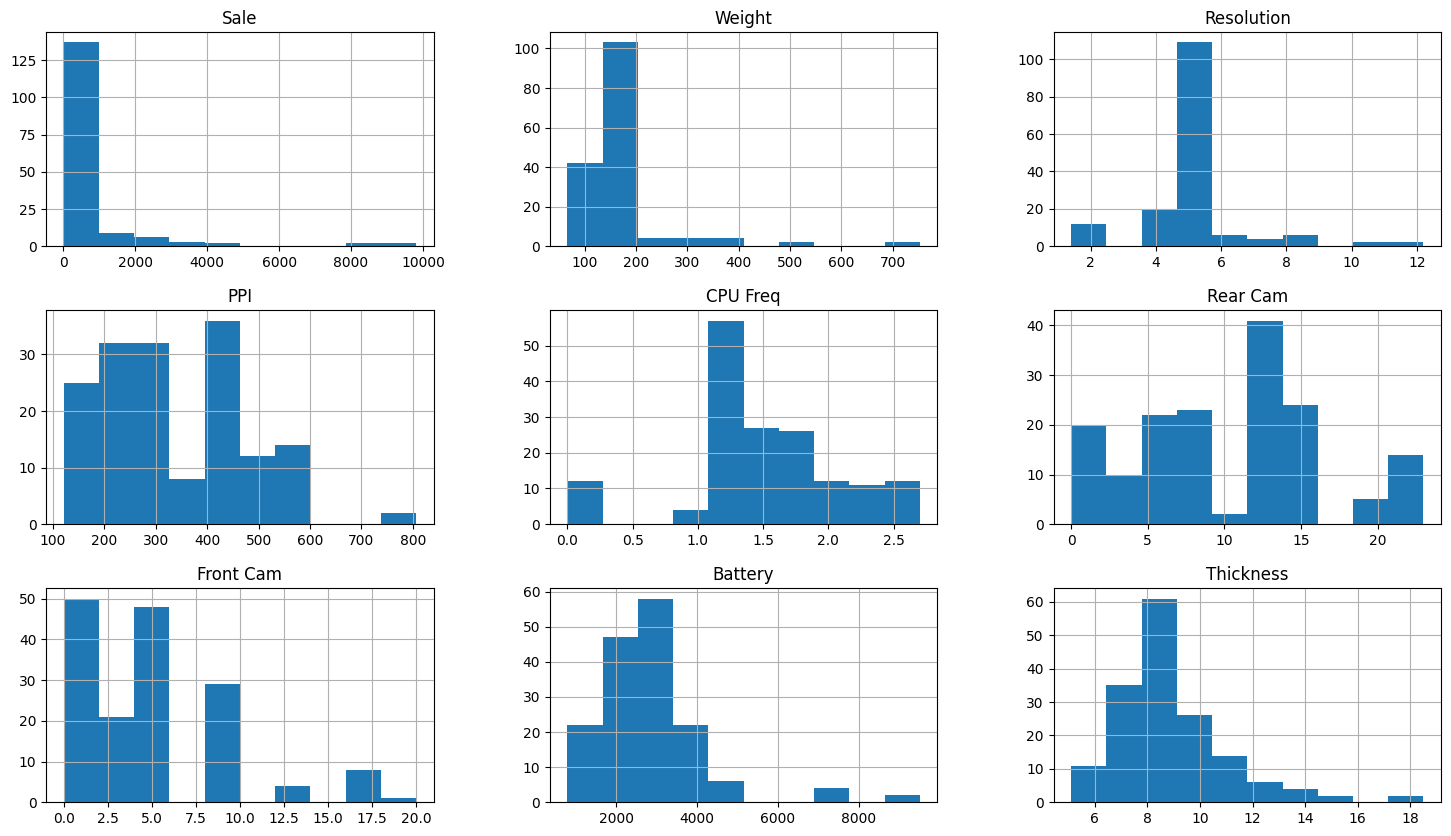

In [62]:
# Plotting histograms of multiple columns together
CellphoneData.hist(['Sale', 'Weight', 'Resolution', 'PPI', 'CPU Freq', 'Rear Cam', 'Front Cam', 'Battery', 'Thickness'], figsize=(18,10))

## Observations from Step 8
* Histogram Interpretation

  Selected Continuous Variables:



*   **Sale** : Selected. Outliers seen around 8000 to 10000, need to treat them.
*   **Weight** : Selected. The distribution is good.
*   **Resolution** : Selected. The distribution is good.
*   **PPI** : Selected. The distribution is good.
*   **CPU Freq** : Selected. The distribution is good.
*   **Rear Cam** : Selected. The distribution is good.
*   **Front Cam** : Selected. The distribution is good..
*   **Battery** : Selected. The distribution is good.
*   **Thickness** : Selected. The distribution is good.

## Step 9: Outlier Analysis


In [63]:
#Replacing outliers for 'Sale'
# Finding nearest values to 10000 mark
CellphoneData['Sale'][CellphoneData['Sale']<10000].sort_values(ascending=False)

160    9807
159    8946
158    8809
157    8016
156    4638
       ... 
4        11
3        11
2        10
1        10
0        10
Name: Sale, Length: 161, dtype: int64

In [65]:
# Replacing outliers with nearest possibe value
CellphoneData['Sale'][CellphoneData['Sale']>6000] =4638

array([[<Axes: title={'center': 'Sale'}>]], dtype=object)

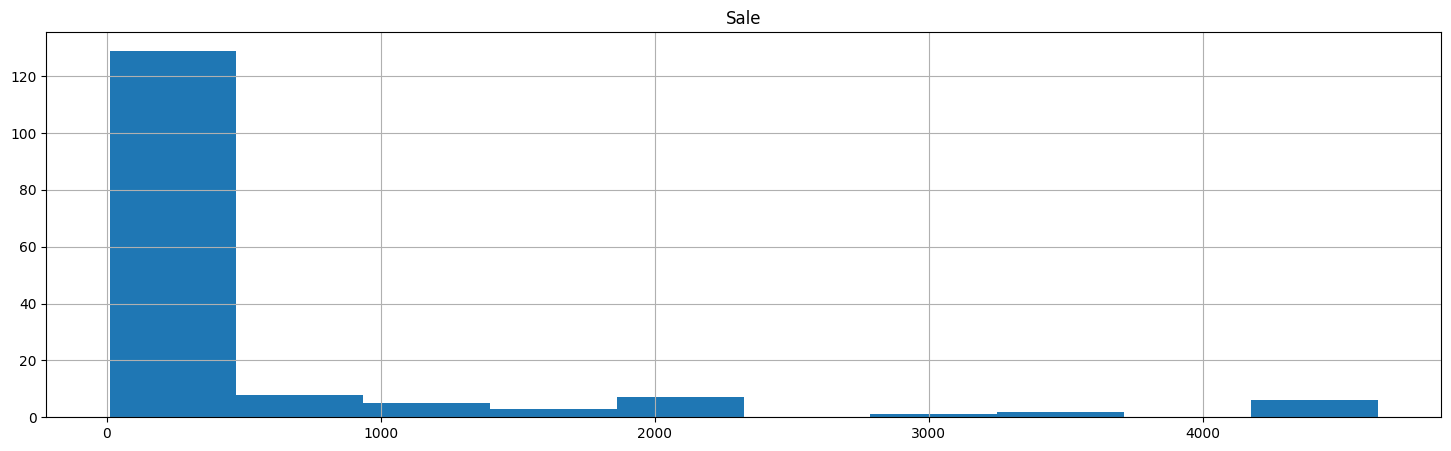

In [66]:
CellphoneData.hist(['Sale'], figsize=(18,5))

## Observation from Step 10
* The distribution has improved after the outlier treatment.
* There is still a tail but the values are now within the 0-5000 range.

## Step 11: Missing Values Analysis

In [67]:
# Finding how many missing values are there for each column
CellphoneData.isnull().sum()

Product ID      0
Price           0
Sale            0
Weight          0
Resolution      0
PPI             0
CPU Core        0
CPU Freq        0
Internal Mem    0
RAM             0
Rear Cam        0
Front Cam       0
Battery         0
Thickness       0
dtype: int64

##Observations from Step 11: Missing Value Analysis
* There are no missing values from this data, therefore no removals of rows are needed.


## Step 12: Feature Selection (Attribute Selection)

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

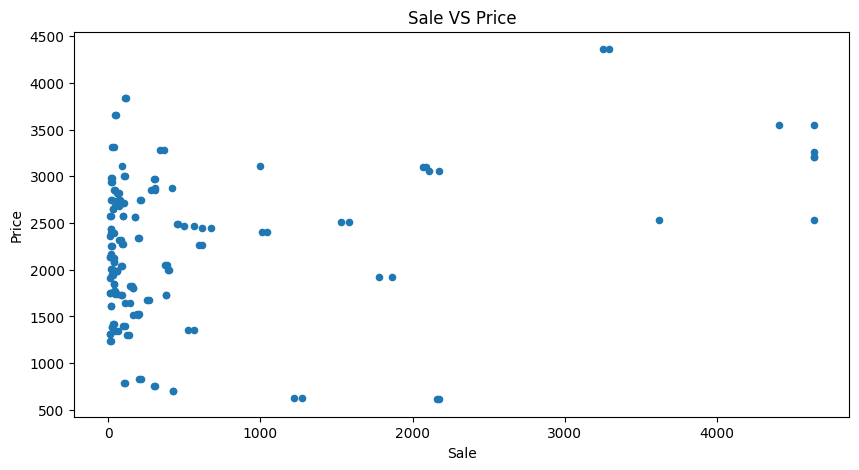

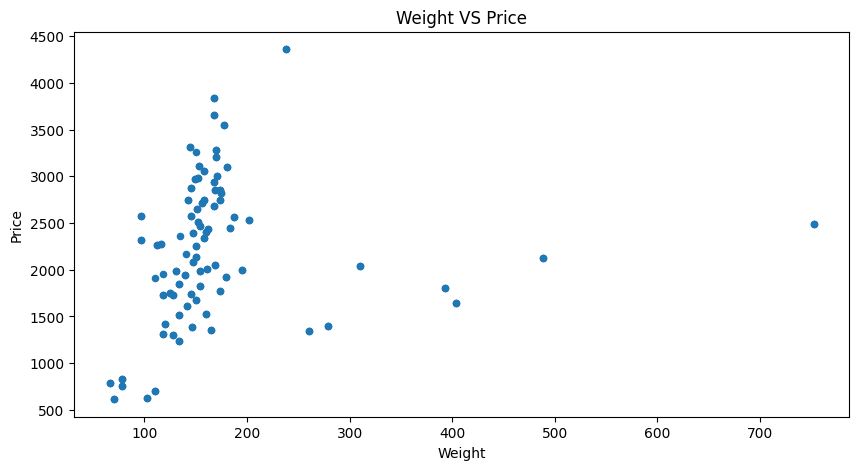

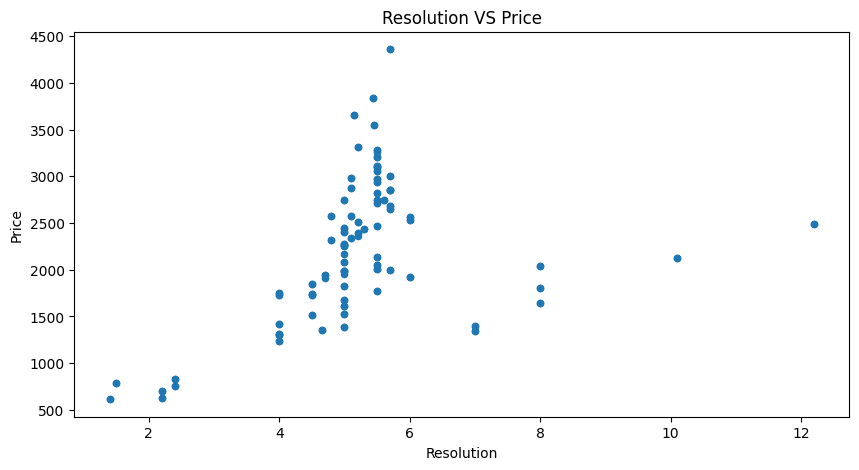

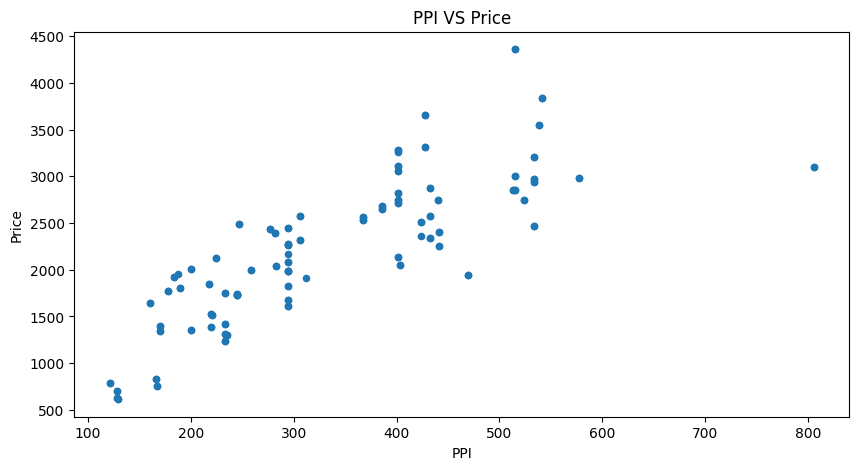

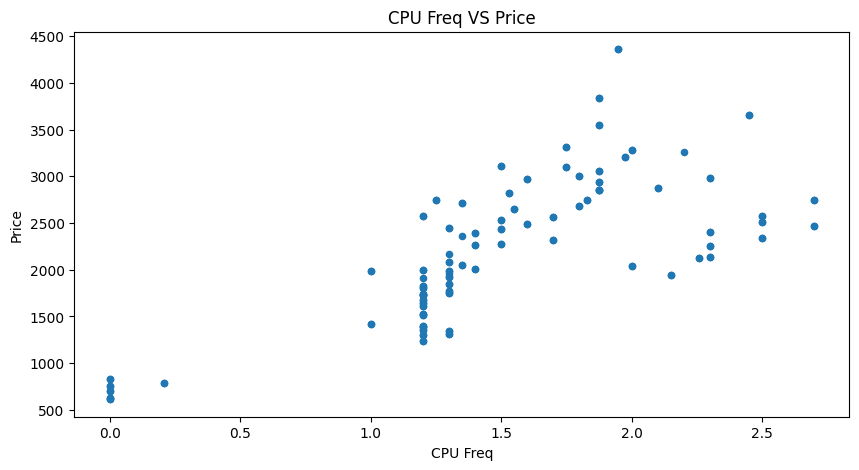

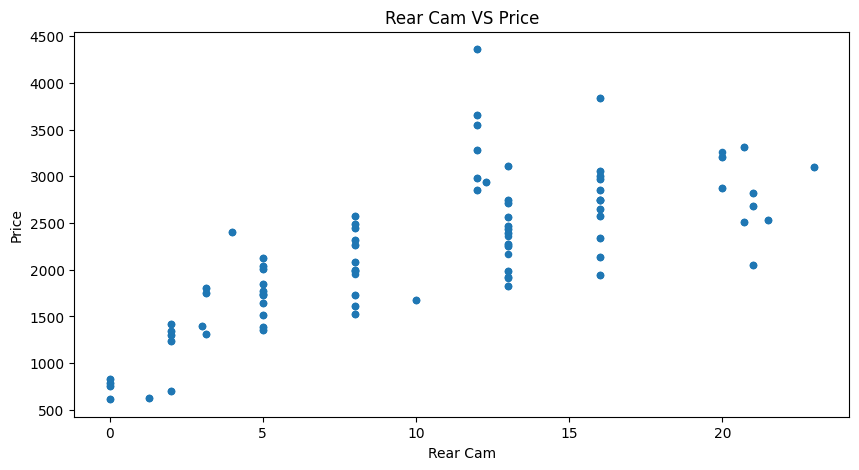

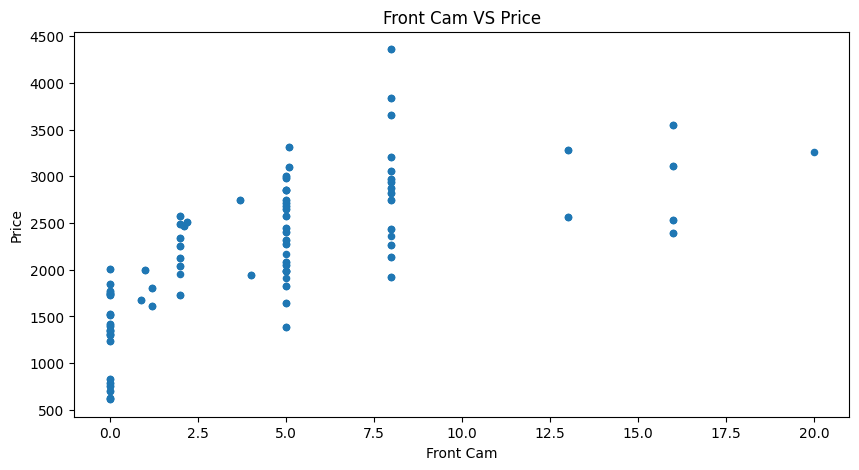

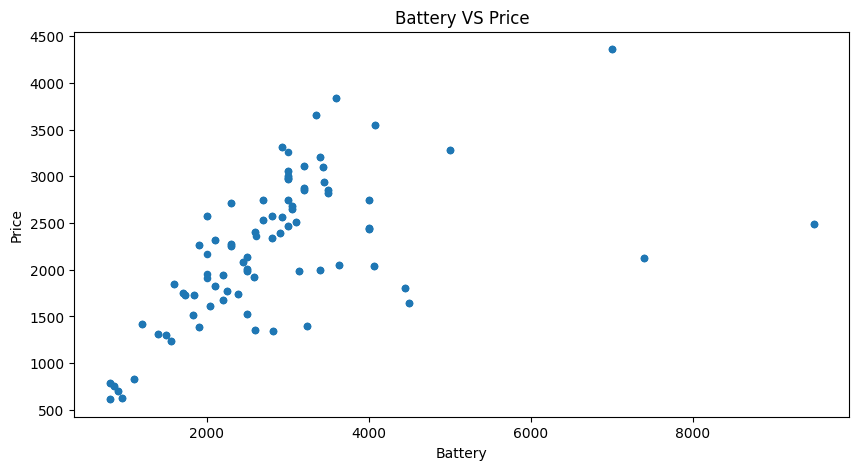

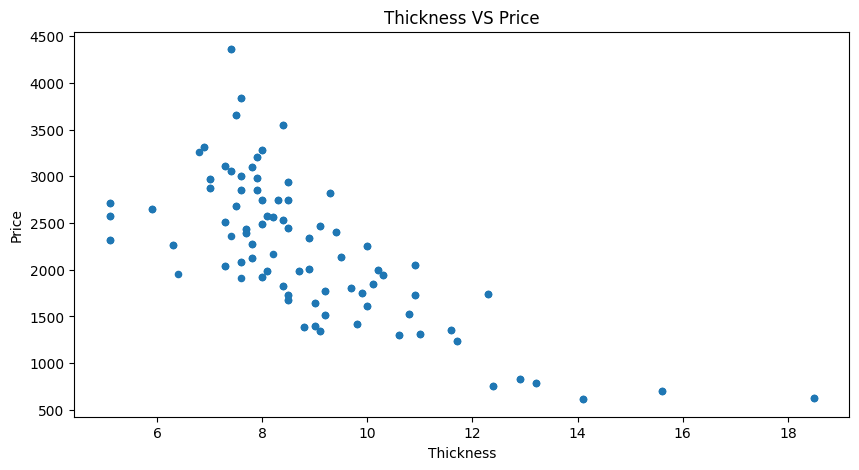

In [69]:
ContinuousCols=['Sale', 'Weight', 'Resolution', 'PPI', 'CPU Freq', 'Rear Cam', 'Front Cam', 'Battery',
                 'Thickness']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    CellphoneData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

## Scatter charts interpretation

* **Sale VS Price** - No trend, very skewed; most sales fell within the 0-1000 range.
* **Weight VS Price** - Increasing trend, very skewed however there is an increase in price as weight increases.
* **Resolution VS Price** - Increasing trend, again very skewed however light increase in price as resolution increases.
* **PPI VS Price** - Increasing trend.
* **CPU Freq VS Price** - Increasing trend.
* **Rear Cam VS Price** - Increasing trend.
* **Front Cam VS Price** - Increasing trend.
* **Battery VS Price** - Increasing trend.
* **Thickness VS Price** - Decreasing trend.


## Step 13: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [70]:
# Calculating correlation matrix
ContinuousCols=['Price','Sale', 'Weight', 'Resolution', 'PPI', 'CPU Freq', 'Rear Cam', 'Front Cam', 'Battery',
                 'Thickness']

# Creating the correlation matrix
CorrelationData=CellphoneData[ContinuousCols].corr()
CorrelationData

,Price,Sale,Weight,Resolution,PPI,CPU Freq,Rear Cam,Front Cam,Battery,Thickness
Price,1.000000,0.302110,0.144555,0.404010,0.817614,0.727383,0.739538,0.675286,0.559946,-0.716773
Sale,0.302110,1.000000,0.019297,-0.004470,0.265335,0.082790,0.270029,0.445173,0.161846,-0.018355
Weight,0.144555,0.019297,1.000000,0.890416,-0.054683,0.222730,-0.029448,-0.005971,0.833783,-0.185262
Resolution,0.404010,-0.004470,0.890416,1.000000,0.181292,0.505454,0.249892,0.202720,0.843462,-0.533708
PPI,0.817614,0.265335,-0.054683,0.181292,1.000000,0.713168,0.774008,0.491371,0.302517,-0.496791
CPU Freq,0.727383,0.082790,0.222730,0.505454,0.713168,1.000000,0.625104,0.358319,0.473137,-0.614458
Rear Cam,0.739538,0.270029,-0.029448,0.249892,0.774008,0.625104,1.000000,0.596374,0.287821,-0.550998
Front Cam,0.675286,0.445173,-0.005971,0.202720,0.491371,0.358319,0.596374,1.000000,0.295283,-0.493542
Battery,0.559946,0.161846,0.833783,0.843462,0.302517,0.473137,0.287821,0.295283,1.000000,-0.412682
Thickness,-0.716773,-0.018355,-0.185262,-0.533708,-0.496791,-0.614458,-0.550998,-0.493542,-0.412682,1.000000


In [71]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price        1.000000
PPI          0.817614
CPU Freq     0.727383
Rear Cam     0.739538
Front Cam    0.675286
Battery      0.559946
Thickness   -0.716773
Name: Price, dtype: float64

## Observations from Step 13
Final selected Continuous columns:

* **PPI**
* **CPU Freq**
* **Rear Cam**
* **Front Cam**
* **Battery**
* **Thickness**

# Step 14:  Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyse the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

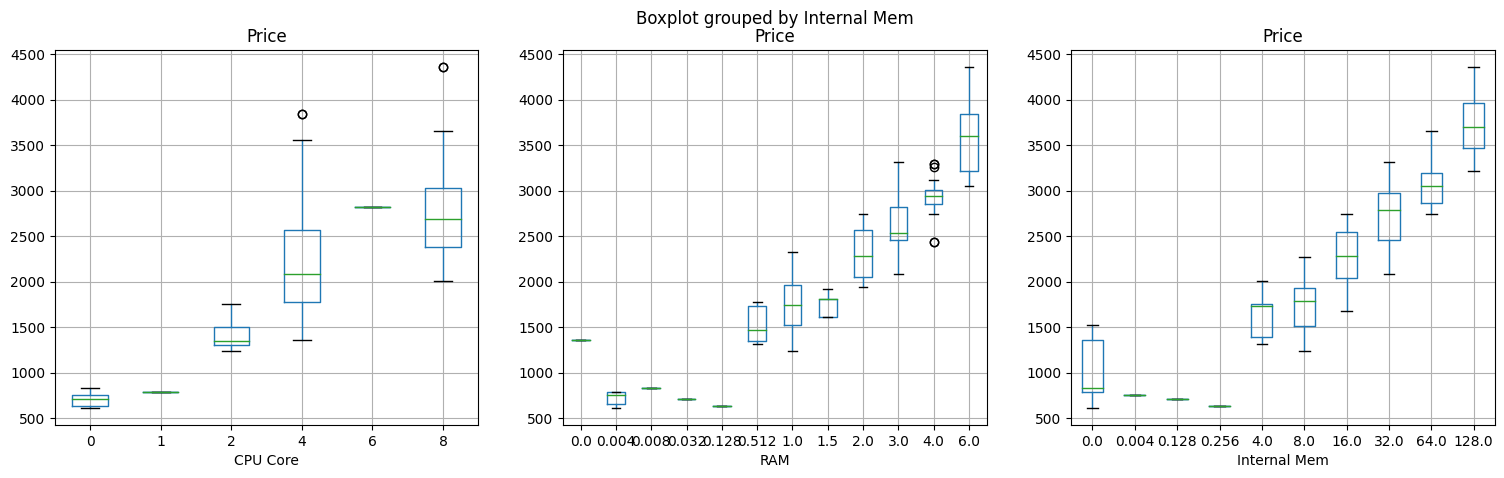

In [72]:
# Box plots for continuous Target Variable "Price" and Categorical predictors
CategoricalColsList=['CPU Core','RAM','Internal Mem']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CellphoneData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

##Observations from Step 14: Box-Plots interpretation

* For this data, all three of the categorical predictors look to be correlated with the Target variable.
* This will be confirmed below.

## Step 15: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [73]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [74]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['CPU Core','RAM','Internal Mem']
FunctionAnova(inpData=CellphoneData,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

CPU Core is correlated with Price | P-Value: 3.721669566887769e-25
RAM is correlated with Price | P-Value: 1.5941027123567347e-60
Internal Mem is correlated with Price | P-Value: 5.612710293590637e-57


['CPU Core', 'RAM', 'Internal Mem']

##Observations from Step 15
The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable.
Final selected Categorical columns:
* **CPU Core**
* **RAM**
* **Internal Mem**


## Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:

* **PPI**
* **CPU Freq**
* **Rear Cam**
* **Front Cam**
* **Battery**
* **Thickness**
* **CPU Core**
* **RAM**
* **Internal Mem**



In [77]:
SelectedColumns=['PPI','CPU Freq','Rear Cam','Front Cam','Battery','Thickness','CPU Core','RAM','Internal Mem']

# Selecting final columns
DataForML=CellphoneData[SelectedColumns]
DataForML.head()

,PPI,CPU Freq,Rear Cam,Front Cam,Battery,Thickness,CPU Core,RAM,Internal Mem
0,424,1.35,13.00,8.0,2610,7.4,8,3.000,16.0
1,233,1.30,3.15,0.0,1700,9.9,2,1.000,4.0
2,312,1.20,13.00,5.0,2000,7.6,4,1.500,8.0
3,233,1.30,3.15,0.0,1400,11.0,2,0.512,4.0
4,233,1.30,3.15,0.0,1700,9.9,2,1.000,4.0


In [78]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Step 16: Data Pre-processing for Machine Learning Model Building or Model Development

## Converting the nominal variable to numeric using get_dummies()

In [79]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=CellphoneData['Price']

# Printing sample rows
DataForML_Numeric.head()

,PPI,CPU Freq,Rear Cam,Front Cam,Battery,Thickness,CPU Core,RAM,Internal Mem,Price
0,424,1.35,13.00,8.0,2610,7.4,8,3.000,16.0,2357
1,233,1.30,3.15,0.0,1700,9.9,2,1.000,4.0,1749
2,312,1.20,13.00,5.0,2000,7.6,4,1.500,8.0,1916
3,233,1.30,3.15,0.0,1400,11.0,2,0.512,4.0,1315
4,233,1.30,3.15,0.0,1700,9.9,2,1.000,4.0,1749


## Step 17: Machine Learning Model Development:

In [80]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['PPI', 'CPU Freq', 'Rear Cam', 'Front Cam', 'Battery', 'Thickness',
       'CPU Core', 'RAM', 'Internal Mem', 'Price'],
      dtype='object')

In [81]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['PPI', 'CPU Freq', 'Rear Cam', 'Front Cam', 'Battery', 'Thickness',
       'CPU Core', 'RAM', 'Internal Mem']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Step 18: Standardisation/Normalisation of data

In [82]:
### Sandardisation of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardisation or Normalisation
# On this data Min Max Normalisation produced better results

# Choose between standardisation and MinMax normalisation
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardised values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 9)
(112,)
(49, 9)
(49,)


## Step 19: Multiple Linear Regression Algorithm For ML/AI model building

In [84]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9438465388327321

##### Model Validation and Accuracy Calculations ##########
        PPI  CPU Freq  Rear Cam  Front Cam   Battery  Thickness  CPU Core  \
0  0.065693  0.000000  0.000000      0.000  0.034483   0.582090       0.0   
1  0.252555  0.444444  0.434783      0.045  0.160920   0.253731       0.5   
2  0.442336  0.925926  0.900000      0.110  0.264368   0.164179       0.5   
3  0.083212  0.481481  0.217391      0.000  0.166667   0.305970       0.5   
4  0.145985  0.444444  0.217391      0.000  0.118391   0.305970       0.5   

        RAM  Internal Mem  Price  PredictedPrice  
0  0.001333       0.00000    833           852.0  
1  0.166667       0.12500   1676          1867.0  
2  0.500000       0.12500   2508          2539.0  
3  0.085333       0.03125   1777          1540.0  
4  0.085333       0.06250   1511          1600.0  
Mean Accuracy on test data: 94.17768796854146
Median Accuracy on test data: 94.69264360094054

Accuracy values for 10-fold

# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9788582750890055

##### Model Validation and Accuracy Calculations ##########
        PPI  CPU Freq  Rear Cam  Front Cam   Battery  Thickness  CPU Core  \
0  0.065693  0.000000  0.000000      0.000  0.034483   0.582090       0.0   
1  0.252555  0.444444  0.434783      0.045  0.160920   0.253731       0.5   
2  0.442336  0.925926  0.900000      0.110  0.264368   0.164179       0.5   
3  0.083212  0.481481  0.217391      0.000  0.166667   0.305970       0.5   
4  0.145985  0.444444  0.217391      0.000  0.118391   0.305970       0.5   

        RAM  Internal Mem  Price  PredictedPrice  
0  0.001333       0.00000    833           754.0  
1  0.166667       0.12500   1676          1685.0  
2  0.500000       0.12500   2508          2550.0  
3  0.085333       0.03125   1777          1685.0  
4  0.085333       0.06250   1511          1685.0  
Mean Accuracy on test data: 93.99803748848359
Median Accuracy on test data: 95.2

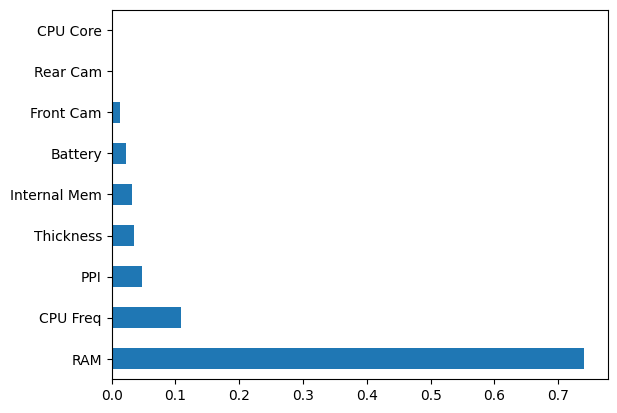

In [85]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting/Visualising the Decision Tree

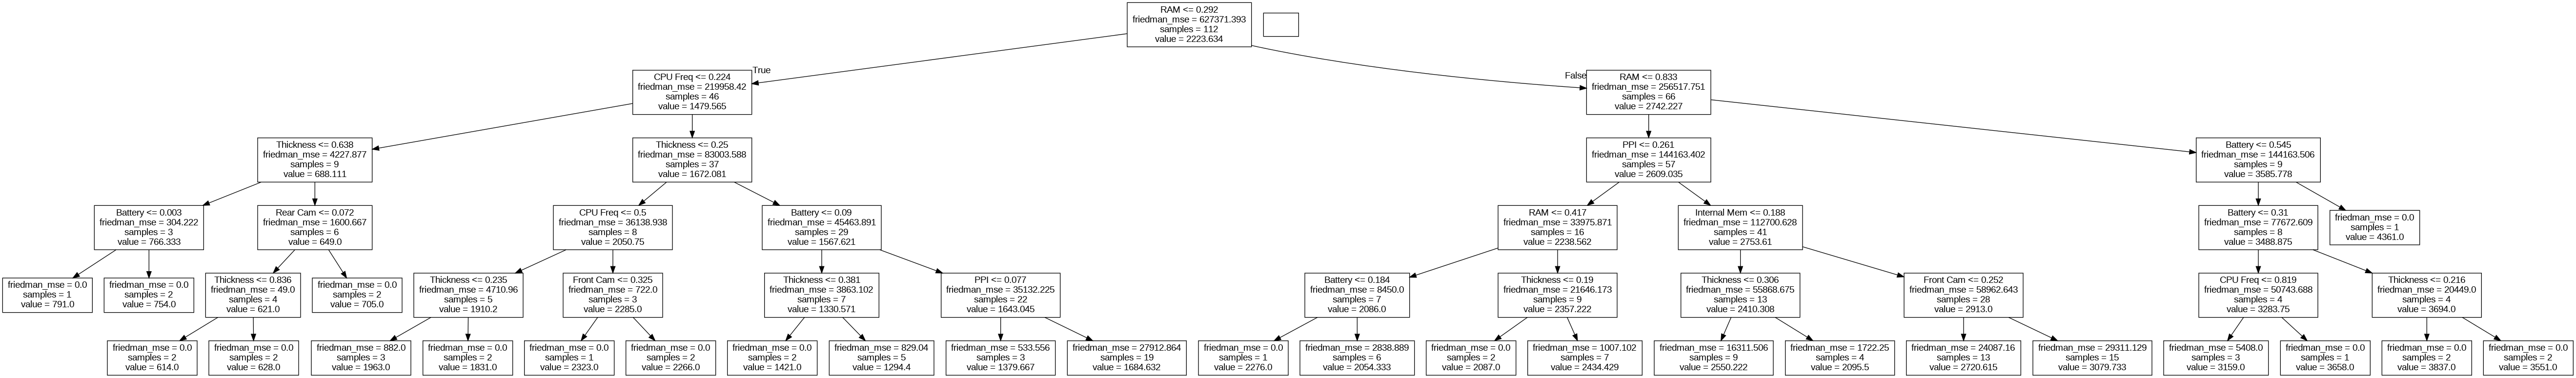

In [86]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9719095550877829

##### Model Validation and Accuracy Calculations ##########
        PPI  CPU Freq  Rear Cam  Front Cam   Battery  Thickness  CPU Core  \
0  0.065693  0.000000  0.000000      0.000  0.034483   0.582090       0.0   
1  0.252555  0.444444  0.434783      0.045  0.160920   0.253731       0.5   
2  0.442336  0.925926  0.900000      0.110  0.264368   0.164179       0.5   
3  0.083212  0.481481  0.217391      0.000  0.166667   0.305970       0.5   
4  0.145985  0.444444  0.217391      0.000  0.118391   0.305970       0.5   

        RAM  Internal Mem  Price  PredictedPrice  
0  0.001333       0.00000    833           857.0  
1  0.166667       0.12500   1676          1856.0  
2  0.500000       0.12500   2508          2600.0  
3  0.085333       0.03125   1777          1661.0  
4  0.085333       0.06250   1511          1633.0  
Mean Accuracy on test data: 93.69196449250357
Median Accuracy 

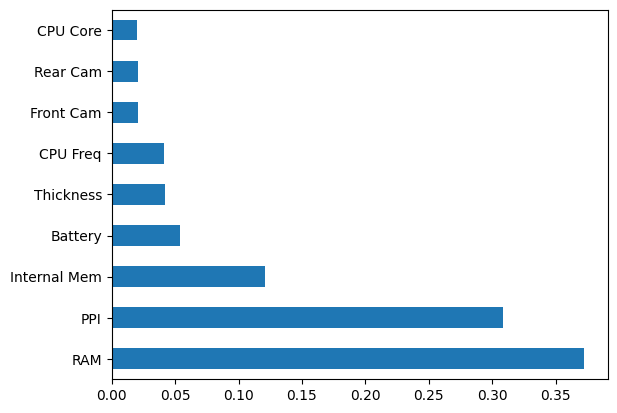

In [87]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

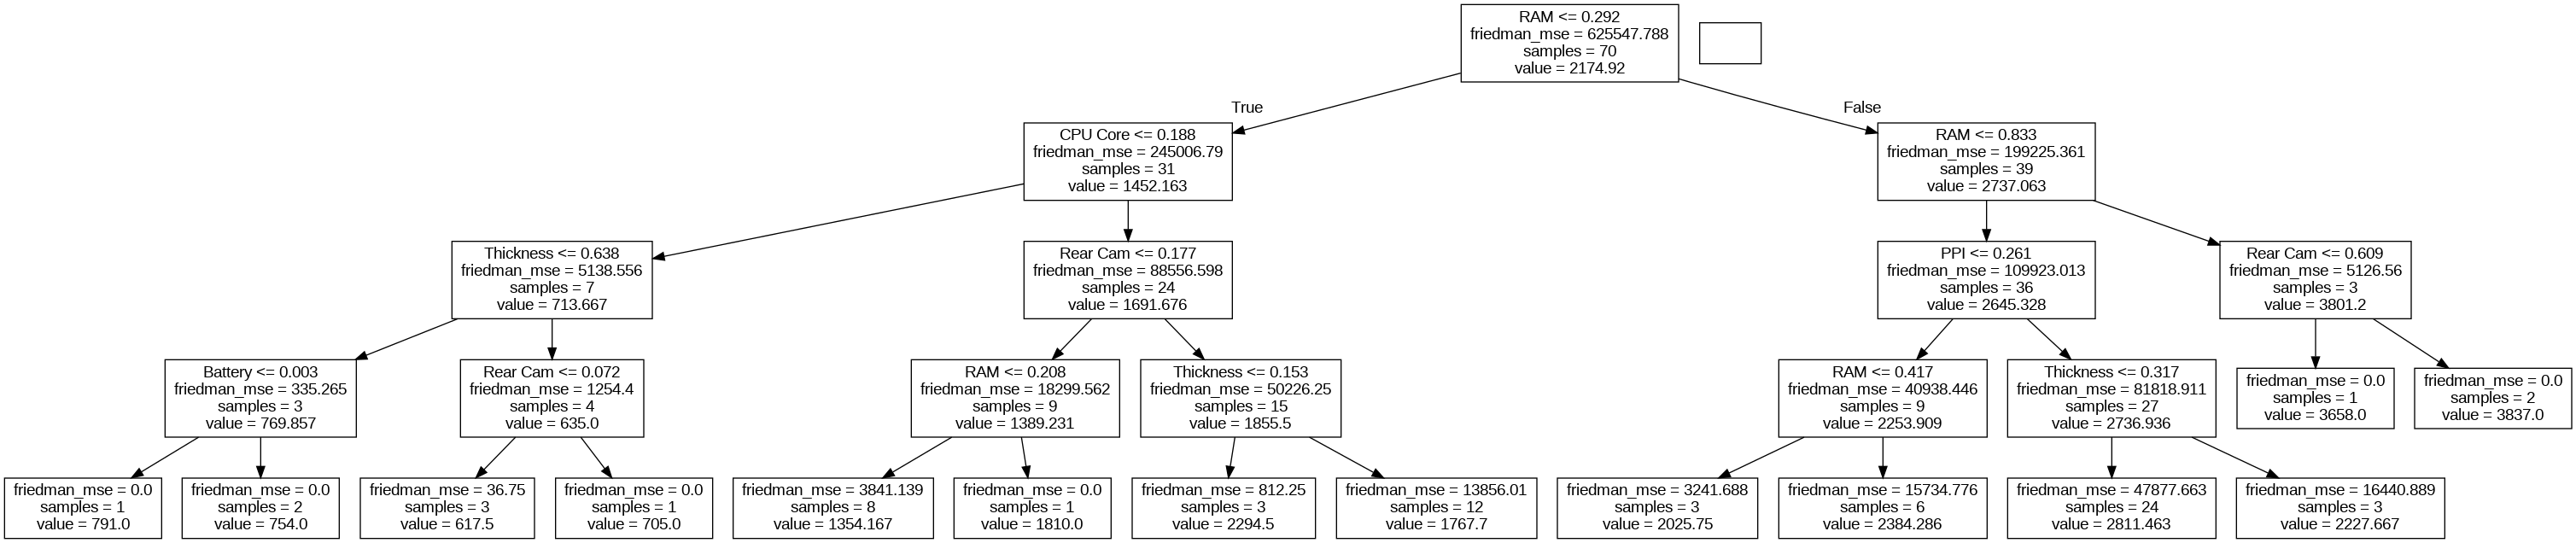

In [89]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in


## Step 20: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9556862573292698

##### Model Validation and Accuracy Calculations ##########
        PPI  CPU Freq  Rear Cam  Front Cam   Battery  Thickness  CPU Core  \
0  0.065693  0.000000  0.000000      0.000  0.034483   0.582090       0.0   
1  0.252555  0.444444  0.434783      0.045  0.160920   0.253731       0.5   
2  0.442336  0.925926  0.900000      0.110  0.264368   0.164179       0.5   
3  0.083212  0.481481  0.217391      0.000  0.166667   0.305970       0.5   
4  0.145985  0.444444  0.217391      0.000  0.118391   0.305970       0.5   

        RAM  Internal Mem  Price  PredictedPrice  
0  0.001333       0.00000    833           726.0  
1  0.166667       0.12500   1676          1875.0  
2  0.500000       0.12500   2508          2524.0  
3  0.085333       0.03125   1777          1655.0  
4  0.085333       0.06250   1511          1655.0  
Mean Accuracy on

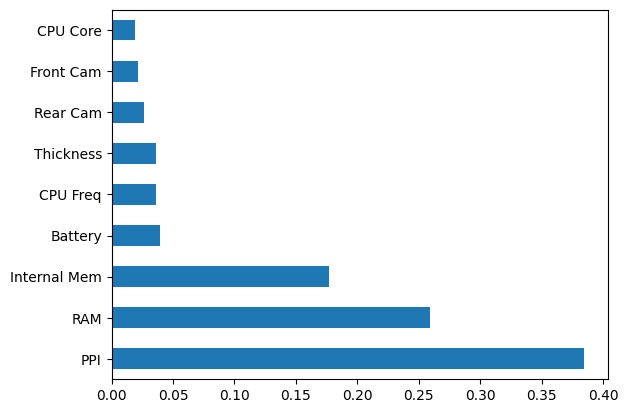

In [90]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9999816267041463

##### Model Validation and Accuracy Calculations ##########
        PPI  CPU Freq  Rear Cam  Front Cam   Battery  Thickness  CPU Core  \
0  0.065693  0.000000  0.000000      0.000  0.034483   0.582090       0.0   
1  0

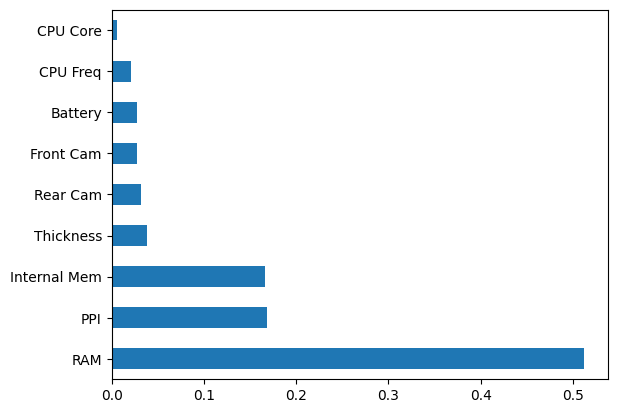

In [91]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

<Axes: >

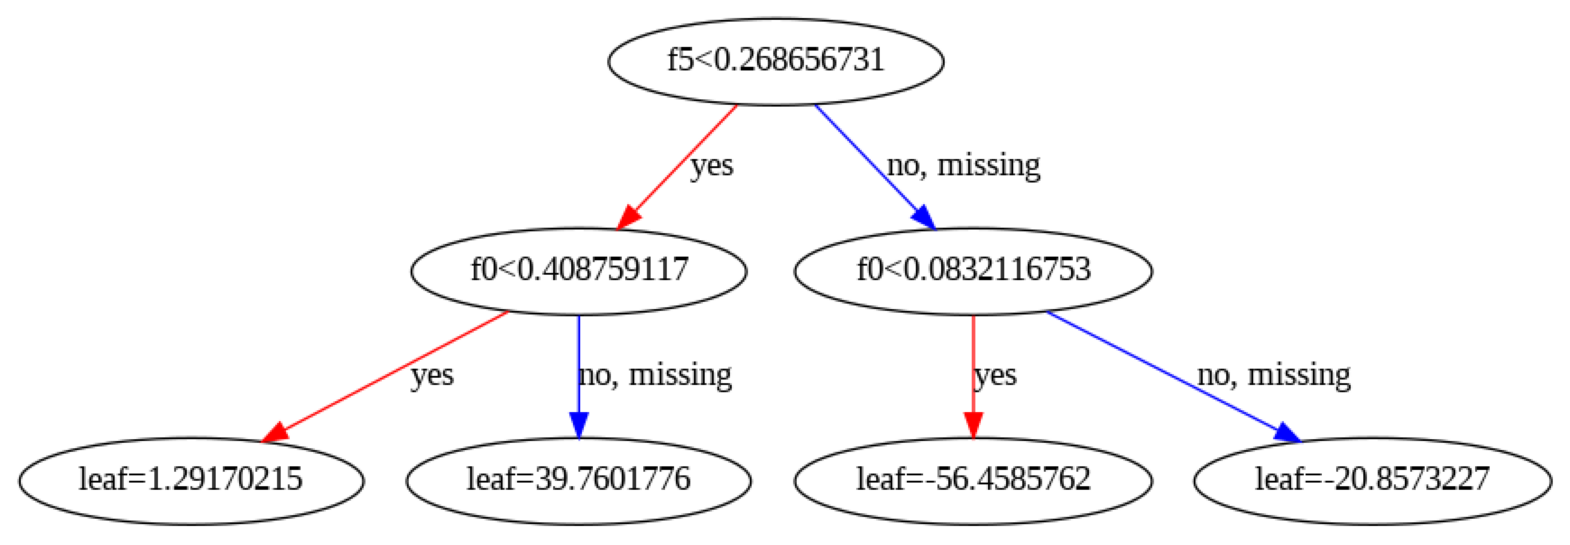

In [92]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [93]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9650309108713585

##### Model Validation and Accuracy Calculations ##########
        PPI  CPU Freq  Rear Cam  Front Cam   Battery  Thickness  CPU Core  \
0  0.065693  0.000000  0.000000      0.000  0.034483   0.582090       0.0   
1  0.252555  0.444444  0.434783      0.045  0.160920   0.253731       0.5   
2  0.442336  0.925926  0.900000      0.110  0.264368   0.164179       0.5   
3  0.083212  0.481481  0.217391      0.000  0.166667   0.305970       0.5   
4  0.145985  0.444444  0.217391      0.000  0.118391   0.305970       0.5   

        RAM  Internal Mem  Price  PredictedPrice  
0  0.001333       0.00000    833           707.0  
1  0.166667       0.12500   1676          1715.0  
2  0.500000       0.12500   2508          2556.0  
3  0.085333       0.03125   1777          1710.0  
4  0.085333       0.06250   1511          1710.0  
Mean Accuracy on test data: 92.42541792282941
Median Accuracy on test data: 92.89617486338798

Accuracy va

# Support Vector Machine (SVM) Regressor

In [97]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.06376459847494964

##### Model Validation and Accuracy Calculations ##########
        PPI  CPU Freq  Rear Cam  Front Cam   Battery  Thickness  CPU Core  \
0  0.065693  0.000000  0.000000      0.000  0.034483   0.582090       0.0   
1  0.252555  0.444444  0.434783      0.045  0.160920   0.253731       0.5   
2  0.442336  0.925926  0.900000      0.110  0.264368   0.164179       0.5   
3  0.083212  0.481481  0.217391      0.000  0.166667   0.305970       0.5   
4  0.145985  0.444444  0.217391      0.000  0.118391   0.305970       0.5   

        RAM  Internal Mem  Price  PredictedPrice  
0  0.001333       0.00000    833          2211.0  
1  0.166667       0.12500   1676          2250.0  
2  0.500000       0.12500   2508          2280.0  
3  0.085333       0.03125   1777          2239.0  
4  0.085333       0.06250   1511          2240.0  
Mean Accuracy on test data: 68.33759866244756
Median Accuracy on test data: 82.15031315240084

Accuracy values for 10-

# Step 21: Model Deployment

* XGboost was chosen as the final model due to having the highest accuracy.

* For this dataset, the most important predictor variables are 'RAM', 'PPI', and 'Internal Mem', as these are consistently are on top of the variable importance chart for every algorithm.

In [98]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['RAM', 'PPI', 'Internal Mem']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardisation of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardisation or Normalisation
# On this data Min Max Normalisation produced better results

# Choose between standardisation and MinMAx normalisation
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardised values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(161, 3)
(161,)
